# K A L L Y S T O – Easy Python Exports

__About the Document__: _In its original form this document is a Jupyter Notebook (`README.ipynb`), but for convenience it has been automatically converted into the more traditional `README.md`. If you are reading the `.md` version then bear in mind that code and output snippets below reflect the contents of Jupyter code/output cells._

## Easy Python Exports

Kallysto is designed to streamline the generation of Python data science publications (papers, articles, presentations, etc.) by making it easy to export data (numbers, text, results, figures, dataframes, etc.) from a notebook (or Python script), for future import into a target publication.

Kallysto is designed with Latex and Markdown publications in mind, and makes it easy to reference exports by name from these document types, and to incorporate these named exports into the resulting Latex or Markdown. 

To do this, Kallysto maintains a persistent, file-based, datastore containing exports and their associated meta-data (export id, source of export, date of export etc.). 

Kallysto bridges an important gap in conventional data science workflows. While it has always been possible to script many workflow elements (data capture, cleaning, analysis, visualisation), generating a publication or report has typically relied on much manual intervention, not just writing the text of the publication but also exporting/importing any result assets (data, tables, figures) produced during the course of the project. Kallyso enables the export/import process through code, so that the publication process can be fully scripted using a some preferred scripting approach (Shell, Make, Python, Papermill, etc.) and/or pipelinig framework (Airflow, Luigi, Pypette, etc.). 

As an added benefit, Kallysto also maintains a detailed export audit trail, thereby helping users to verify the provence of results over time.

All of this greatly improves the repeatability, replicability, and reproducibility of data-driven research projects.

## Installation
For now, install from source by cloning this repo and using a local `pip install -e`:

```
git clone https://github.com/barrysmyth/kallysto
cd kallysto
pip install -e .
```

## Usage
The following is a summary of how to get started with Kallysto. This document shows one example of each type of Kallysto export, describes how they are stored in the Kallysto datastore, and explains how they can be incoporated into a target publication type, whether Latex or Markdown.

In what follows, when we talk about a `Publication` we are referring to some publication project –– a report, article, or presentation, for example. Kallysto assumes that such a project will have a name or `title` and it further assumes that the files for this project will be stored in a directory of the same name. 

As we shall explain, when exports are generated Kallysto will use this publication directory as the parent directory of a file-based data store that is used to store and track any exports and their associated meta-data.

Below, we will work through a _live_ use-case, using Kallysto to export data assests to two different types of publication, Latex and Markdown. All of this will happen within a _sandbox_ that will be created hold these (temporary publications, and their Kallysto datastores) for the purpose of this walk-through, and then deleted afterwards.

### Creating Sandbox
First we begin with a few imports, including the all-important Kallyso imports, and then we setup the temporary sandbox, which is just a directory to store the publications that will be created below.

In [1]:
import os
from shutil import rmtree
import pandas as pd
from matplotlib.pylab import plt
from tabulate import tabulate  # Used to display text-based tables.

# The important Kallysto imports.
from kallysto.publication import Publication
from kallysto.export import Export
from kallysto.formatter import Latex, Markdown
import kallysto.markdown

In [2]:
rmtree('sandbox', ignore_errors=True) # Del pre-existing sandbox if it exists.
os.mkdir('sandbox')  # Create fresh sandbox.

!tree sandbox

sandbox

0 directories, 0 files


## Some Sample Sales Data
In what follows we will demonstrate Kallysto by using some sample sales data, defined as a dataframe below.

_Note: we display the dataframe  in a text-based format only because it makes it easier to convert this notebook into a markdown file, without the need to include HTML code. The use of tabulate for this purpose has nothing to do with Kallysto._

In [5]:
sales = pd.DataFrame.from_dict(
    
    {'OrderDate': {0: 43106,1: 43123, 2: 43140, 3: 43157, 4: 43174,
                   5: 43191, 6: 43208, 7: 43225, 8: 43242, 9: 43259,
                   10: 43276, 11: 43293, 12: 43310, 13: 43327},
     
     'Region': {0: 'East', 1: 'Central', 2: 'Central', 3: 'Central', 4: 'West',
                5: 'East', 6: 'Central', 7: 'Central', 9: 'East',
                10: 'Central', 11: 'East', 12: 'East', 13: 'East'},
     
     'Rep': {0: 'Jones', 1: 'Kivell', 2: 'Jardine', 3: 'Gill', 4: 'Sorvino',
             5: 'Jones', 6: 'Andrews', 7: 'Jardine', 8: 'Thompson', 9: 'Jones',
             10: 'Morgan', 11: 'Howard', 12: 'Parent', 13: 'Jones'},
     
     'Item': {0: 'Pencil', 1: 'Binder', 2: 'Pencil', 3: 'Pen', 4: 'Pencil',
              5: 'Binder', 6: 'Pencil', 7: 'Pencil', 8: 'Pencil', 9: 'Binder',
              10: 'Pencil', 11: 'Binder', 12: 'Binder', 13: 'Pencil'},
     
     'Units': {0: 95, 1: 50, 2: 36, 3: 27, 4: 56,
               5: 60, 6: 75, 7: 90, 8: 32, 9: 60,
               10: 90, 11: 29, 12: 81, 13: 35},
     
     'Unit Cost': {0: 1.99, 1: 19.99, 2: 4.99, 3: 19.99, 4: 2.99,
                   5: 4.99, 6: 1.99, 7: 4.99, 8: 1.99, 9: 8.99,
                   10: 4.99, 11: 1.99, 12: 19.99, 13: 4.99},
     
     'Total': {0: 189.05, 1: 999.5, 2: 179.64, 3: 539.73, 4: 167.44,
               5: 299.4, 6: 149.25, 7: 449.1, 8: 63.68, 9: 539.4,
               10: 449.1, 11: 57.71, 12: 1619.19, 13: 174.65},
    }
)

print(tabulate(sales, headers="keys", tablefmt='fancy_grid'))

╒════╤═════════════╤══════════╤══════════╤════════╤═════════╤═════════════╤═════════╕
│    │   OrderDate │ Region   │ Rep      │ Item   │   Units │   Unit Cost │   Total │
╞════╪═════════════╪══════════╪══════════╪════════╪═════════╪═════════════╪═════════╡
│  0 │       43106 │ East     │ Jones    │ Pencil │      95 │        1.99 │  189.05 │
├────┼─────────────┼──────────┼──────────┼────────┼─────────┼─────────────┼─────────┤
│  1 │       43123 │ Central  │ Kivell   │ Binder │      50 │       19.99 │  999.5  │
├────┼─────────────┼──────────┼──────────┼────────┼─────────┼─────────────┼─────────┤
│  2 │       43140 │ Central  │ Jardine  │ Pencil │      36 │        4.99 │  179.64 │
├────┼─────────────┼──────────┼──────────┼────────┼─────────┼─────────────┼─────────┤
│  3 │       43157 │ Central  │ Gill     │ Pen    │      27 │       19.99 │  539.73 │
├────┼─────────────┼──────────┼──────────┼────────┼─────────┼─────────────┼─────────┤
│  4 │       43174 │ West     │ Sorvino  │ Pencil │   

### Linking a Notebook to a Publication 
To get started with Kallysto we must link a given notebook with the publication project. We do this by creating a new `Publication(...)` instance in our notebook, with arguments that include: 

1. a _notebook_ name; 
2. the _title_ of the publication;  
3. the relative path from the notebook to the publication root, _pub_root_.

For example, in the code below, we create a new `Publication(...)` instance in the target notebook (_this notebook_ if you are reading the Jupyter notebook rather than the corresponding markdown file) and link it to a publication project called `latex_report` stored in the same directory as the notebook.

In [6]:
# Create a link between this notebook and the target publication (a_report)
latex_report = Publication(
    notebook='README.ipynb',  # Current notebook name
    title='latex_report',     # Publication name
    pub_path='sandbox/',         # Location of publication project relative to this notebook.
    formatter=Latex,          # Default publictaion format; Markdown can also be used.
    
    overwrite=True,           # Overwrite any existing exports if they exist.
    fresh_start=True          # Delete log and include files if they exist.
)

Kallysto generates its datastore, as per the directory tree shown below. The root of the datastore is Kallysto generated directory called `_kallysto` which contains the main export subdirectories to store data (`data/`) and figure (`figs/)` exports, and their Latex definitions (`defs/`). 

Notice how there are subdirectories named after the exporting notebook (this notebook, `README.ipynb`) inside the various Kallysto subdirectories. This makes it easy for exports from different notebooks, but to the same publication, to co-exist in the datastore.

The datastore also includes a `logs/` subdirectory, which holds a log of all exports (`kallysto.log`) for a target publication. 

By default Kallyso will also create publication source directories inside the main publication directory (`latex_report`) to contain the user's source files; in this example a `tex` directory is created because the target publication is a Latex publication. Kallysto also adds a special file called `kallysto.tex` to this directory which, as we shall discuss below, makes it easy for the user to include kallysto's exports in their main tex file.

In [7]:
# The current directory tree (with main Kallysto directories/files)
!tree sandbox

sandbox
└── latex_report
    ├── _kallysto
    │   ├── data
    │   │   └── README.ipynb
    │   ├── defs
    │   │   └── README.ipynb
    │   │       └── _definitions.tex
    │   ├── figs
    │   │   └── README.ipynb
    │   └── logs
    │       └── kallysto.log
    └── tex
        └── kallysto.tex

10 directories, 3 files


### Exporting from a Notebook
Kallysto currently supports three types of exports, _tables_, _figures_, and _values_,. Generating an export is a matter of calling the appropriate export command and sending the resulting export to the right publication.

#### Exporting a Table
The example code below reads in a dataset of sales data and then create a dataframe that aggregates sales totals by sales rep.

In [8]:
# Total sales by representative
sales_by_rep = sales.groupby('Rep')[['Total']].sum()
print(tabulate(sales_by_rep, headers="keys", tablefmt='fancy_grid'))

╒══════════╤═════════╕
│ Rep      │   Total │
╞══════════╪═════════╡
│ Andrews  │  149.25 │
├──────────┼─────────┤
│ Gill     │  539.73 │
├──────────┼─────────┤
│ Howard   │   57.71 │
├──────────┼─────────┤
│ Jardine  │  628.74 │
├──────────┼─────────┤
│ Jones    │ 1202.5  │
├──────────┼─────────┤
│ Kivell   │  999.5  │
├──────────┼─────────┤
│ Morgan   │  449.1  │
├──────────┼─────────┤
│ Parent   │ 1619.19 │
├──────────┼─────────┤
│ Sorvino  │  167.44 │
├──────────┼─────────┤
│ Thompson │   63.68 │
╘══════════╧═════════╛


In the code below, Kallysto exports this dataframe using `Export.table`, providing the dataframe as input, along with an export name (`SalesByRepTable`), and a caption for the Latex table.

The `Export.table(...)` command generates an export _object_, but the actual export _process_ –– the transfer of the export object to the Kallysto datastore –– only happens via the `table > latex_report`. By separating the generation of the export object, from the transfer to the publication, in this way, it means that we can store the export objects in a variable (_table_ in this case) and transfer the same export object to different publications, all from a single notebook.

The export generates a CSV file from the dataframe and saves it for future reference in `latex_report/data/README.ipynb/SalesByReo.csv`; see the directory tree below.

The Kallysto log (`latex_report/logs/kallysto.log`) records the export with a unique id including a reference to the saved CSV. 

In [9]:
# Create a table export object and store in a variable called table.
sales_by_rep_table = Export.table('SalesByRepTable', 
             data=sales_by_rep,
             caption='Sales totals by sales representative (\$US).'
) 

# Transfer the export to the latex report.
sales_by_rep_table > latex_report

# View updated data store
!tree sandbox

sandbox
└── latex_report
    ├── _kallysto
    │   ├── data
    │   │   └── README.ipynb
    │   │       └── SalesByRepTable.csv
    │   ├── defs
    │   │   └── README.ipynb
    │   │       └── _definitions.tex
    │   ├── figs
    │   │   └── README.ipynb
    │   └── logs
    │       └── kallysto.log
    └── tex
        └── kallysto.tex

10 directories, 4 files


Kallysto also adds a Latex table defintion (shown below) to the definitions file for the notebook (`latex_report/defs/README.ipynb/_definitions.tex`), labeling defintion with the export name so that it can be referenced as `\ref{SalesByRepTable}` in the main Latex file. 

Notice too how the Latex defintion includes the export id as part of its meta-data, and links to the source notebook and the saved CSV. This is the same id used by the Kallysto log, making it easy to track the provence of the export.

In [10]:
# The resulting Latex table defintion code.
!tail -n 35 sandbox/latex_report/_kallysto/defs/README.ipynb/_definitions.tex 

% Uid: 1544536635.945051
% Created: 13:57:15 12/11/18 GMT
% Exported: 13:57:15 12/11/18 GMT
% Title: latex_report
% Notebook: ../../../README.ipynb
% Data file: ../_kallysto/data/README.ipynb/SalesByRepTable.csv
\providecommand{\SalesByRepTable}{
dummy}
\renewcommand{\SalesByRepTable}{
    \begin{table}[h]
        \centering
        \begin{tabular}{lr}
			\toprule
			{} &    Total \\
			Rep      &          \\
			\midrule
			Andrews  &   149.25 \\
			Gill     &   539.73 \\
			Howard   &    57.71 \\
			Jardine  &   628.74 \\
			Jones    &  1202.50 \\
			Kivell   &   999.50 \\
			Morgan   &   449.10 \\
			Parent   &  1619.19 \\
			Sorvino  &   167.44 \\
			Thompson &    63.68 \\
			\bottomrule
			\end{tabular}

        \caption{Sales totals by sales representative (\$US).}
        \label{SalesByRepTable}
    \end{table}
}




#### Exporting a Figure
Figure exports are similar. The code snippet below generates a simple barplot for the sales total table, and the figure export command exports the image (accessible via  `fig`) and the underlying dataframe. Once again the `Export.figure(...)` command generates an export object which is transferred to the publication via the `figure > report`.

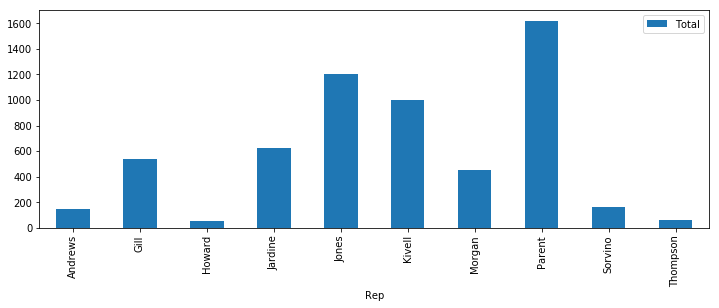

In [11]:
# An example barchart and figure export.
fig, ax = plt.subplots(figsize=(12, 4))

sales_by_rep.plot(kind='bar', ax=ax)

sales_by_rep_bar_chart = Export.figure(
    'SalesByRepBarChart',  # Export name
    image=fig,             # The plot to be exported
    data=sales_by_rep,     # The data used to produce the plot.
    caption='Sales totals by sales representative (\$US).'
) 

sales_by_rep_bar_chart > latex_report;

The image is stored in `latex_report/figs/README.ipynb/` as `SalesByRepBarChart.pdf` and the dataframe is stored in `latex_report/data/README.ipynb/`, as shown below.

In [12]:
# The updated data store, including the new figure PDF and its corresponding data file.
!tree sandbox

sandbox
└── latex_report
    ├── _kallysto
    │   ├── data
    │   │   └── README.ipynb
    │   │       ├── SalesByRepBarChart.csv
    │   │       └── SalesByRepTable.csv
    │   ├── defs
    │   │   └── README.ipynb
    │   │       └── _definitions.tex
    │   ├── figs
    │   │   └── README.ipynb
    │   │       └── SalesByRepBarChart.pdf
    │   └── logs
    │       └── kallysto.log
    └── tex
        └── kallysto.tex

10 directories, 6 files


In [13]:
# The newly added Latex figure defintion code.
!tail -n 20 sandbox/latex_report/_kallysto/defs/README.ipynb/_definitions.tex 


% Uid: 1544536638.1019561
% Created: 13:57:18 12/11/18 GMT
% Exported: 13:57:18 12/11/18 GMT
% Title: latex_report
% Notebook: ../../../README.ipynb
% Image file: ../_kallysto/figs/README.ipynb/SalesByRepBarChart.pdf
% Data file: ../_kallysto/data/README.ipynb/SalesByRepBarChart.csv
\providecommand{\SalesByRepBarChart}{
dummy}
\renewcommand{\SalesByRepBarChart}{
    \begin{figure}
        \center
        \includegraphics[width=1\textwidth]{../_kallysto/figs/README.ipynb/SalesByRepBarChart.pdf}
        \caption{Sales totals by sales representative (\$US).}
        \label{SalesByRepBarChart}
    \end{figure}
}




#### Exporting a Value
We've left the simplest type of export -- a _value_ export -- for last. Value exports allow us to export simple forms of data –– anything that can be rendered as a string, in fact –– which makes value exports very flexible indeed. 

As an example, we might want to compute and discuss the overall sales total in our report. We do this in the code below, naming the value export as `TotalSales`.

In [14]:
# Exporting the sales total.
total_sales = Export.value('TotalSales', sales_by_rep['Total'].sum()) 
total_sales > latex_report

Value('TotalSales', 5876.84)

Value exports are written to the Kallysto data store as simple text files, containing just the exported value, and stored alongside other data components in `latex_report/data/README.ipynb/`.

In [15]:
# The updated data store, including the new value export as TotalSales.txt.
!tree sandbox

sandbox
└── latex_report
    ├── _kallysto
    │   ├── data
    │   │   └── README.ipynb
    │   │       ├── SalesByRepBarChart.csv
    │   │       ├── SalesByRepTable.csv
    │   │       └── TotalSales.txt
    │   ├── defs
    │   │   └── README.ipynb
    │   │       └── _definitions.tex
    │   ├── figs
    │   │   └── README.ipynb
    │   │       └── SalesByRepBarChart.pdf
    │   └── logs
    │       └── kallysto.log
    └── tex
        └── kallysto.tex

10 directories, 7 files


The Latex definition (from `latex_report/defs/README.ipynb/_definitions.tex`) for the value is shown below, and as before includes meta-data as comments to help link the definition to the log.

In [16]:
# The updated Latex defintion code for the value export.
!tail -n 12 sandbox/latex_report/_kallysto/defs/README.ipynb/_definitions.tex

% Uid: 1544536640.17378
% Created: 13:57:20 12/11/18 GMT
% Exported: 13:57:20 12/11/18 GMT
% Title: latex_report
% Notebook: ../../../README.ipynb
% Data file: ../_kallysto/data/README.ipynb/TotalSales.txt
\providecommand{\TotalSales}{
dummy}
\renewcommand{\TotalSales}{
5876.84}




### Importing into Latex
Now that we have generated and transferred our exports we need to import them into our Latex document, where they can be displayed, referenced, and discussed as needed.

#### Latex Command Definitions
The Latex language allows for user-defined commands, which is how Kallysto incorporates exports into Latex documents. Each export generates a new command defintion named after the export. A value export generates a command that simply returns the value. A table export generates a command that returns a Latex table. And a figure export generates a command that returns a Latex figure definition. These commands are all stored in the defintions files as mentioned above.

A minor point worth noting is that each command is actually a pair of commands (`\providecommand{}{}` followed by a `renewcommand{}{}`) which makes it possible to Kallysto to overwrite earlier exports of the same name, without the overhead of managing duplicate command definitions; this is one of those Latex hacks that are best forgotten about as it does not have any bearing on Kallysto usage.

#### Latex `\input`
To get import these defintions into a Latex document we can use the Latex `\input{...}` command, with the location of the defintions file as its argument. If we generate exports from multiple notebooks, then this will produce multiple defintions files, and they will all need to be imported separately. 

To make things easier, Kallysto maintains a special file called `kallysto.tex` (inside the `tex` subdirectory), which is automatically populated with the input statements for all of the definitions files associated with a publication. Then the user just needs to include the main `kallysto.tex` file, and all of the individual defintions files will be automatically included.

The code below generates a minimal latex file and saves it to `sandbox/latex_report/tex/latex_report.tex`. Ordinarily this file would be created and authored by the end-user; we are adding it here for convenience and to avoid the need to include a sample `.tex` file.

In [17]:
minimal_latex = r"""
\documentclass[10pt]{article} 

\usepackage{booktabs}  % Needed for tables.
\usepackage{graphicx}  % Needed for figures.

\title{A Latex Report}

\date{}

\begin{document}

\maketitle 

\input{kallysto.tex}   % Include Kallysto defs.

% The text below makes reference to the three 
% exports made from the sample notebook.

Table \ref{SalesByRepTable} summarises the sales totals by sales rep and the same data is also shown in Figure \ref{SalesByRepBarChart}, for an overall sales total of \TotalSales. Notice how the table and figure references in this paragraph are also dynamically created using references to the appropriate export names.

\SalesByRepTable   % Include the sales table here.

\SalesByRepBarChart  % Include the sales bar chart here.

\end{document}"""

# Save the minimal latex.
with open('sandbox/latex_report/tex/latex_report.tex', 'w+') as latex_source:
    latex_source.write(minimal_latex)

Here is what the `demo/latex_report/tex/latex_report.tex` file looks like. We can see the `\input{kallysto.tex}` statement for including the various defintions files. The exports are included by calling the newly defined Latex command of the same name: `TotalSales`, `SalesByRepTable`, and `SalesByRepBarChart`, in this case.

Also there are a number of references (`\ref{SalesByRepTable}`, `\ref{SalesByRepBarChart}`) to refer to particular tables and figures by name.

In [18]:
# A minimal Latex document
!cat sandbox/latex_report/tex/latex_report.tex


\documentclass[10pt]{article} 

\usepackage{booktabs}  % Needed for tables.
\usepackage{graphicx}  % Needed for figures.

\title{A Latex Report}

\date{}

\begin{document}

\maketitle 

\input{kallysto.tex}   % Include Kallysto defs.

% The text below makes reference to the three 
% exports made from the sample notebook.

Table \ref{SalesByRepTable} summarises the sales totals by sales rep and the same data is also shown in Figure \ref{SalesByRepBarChart}, for an overall sales total of \TotalSales. Notice how the table and figure references in this paragraph are also dynamically created using references to the appropriate export names.

\SalesByRepTable   % Include the sales table here.

\SalesByRepBarChart  % Include the sales bar chart here.

\end{document}

### Generating the Publication
In this way, by including a single defintions file, which Kallysto produces, into the main Latex document, an author can gain immediate access to all of the exports that have been generated by Kallysto, potentially from multiple different notebooks, reflecting different parts of a complex analysis.

And, just for completeness we can programmatically generate the resulting latex publication as follows:

In [19]:
# Compile the Latex doc
!latexmk -pdf -pdflatex="pdflatex -interaction=batchmode" -f -cd -use-make sandbox/latex_report/tex/latex_report.tex && latexmk -c -cd sandbox/latex_report/tex/latex_report.tex 

Latexmk: This is Latexmk, John Collins, 22 April 2016, version: 4.45.
Latexmk: Changing directory to 'sandbox/latex_report/tex/'
Latexmk: applying rule 'pdflatex'...
Rule 'pdflatex': Rules & subrules not known to be previously run:
   pdflatex
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex -interaction=batchmode  -recorder  "latex_report.tex"'
------------
This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
Latexmk: References changed.
Latexmk: Log file says output to 'latex_report.pdf'
Latexmk: List of undefined refs and citations:
  Reference `SalesByRepBarChart' on page 1 undefined on input line 20
  Reference `SalesByRepTable' on page 1 undefined on input line 20
Latexmk: Summary of warnings:
  Latex failed to resolve 2 reference(s)
Latexmk: applying rule 'pdflatex'.

In [20]:
# Convert resulting pdf to png because its easier to display in Jupyter.
!sips -s format png sandbox/latex_report/tex/latex_report.pdf --out sandbox/latex_report/tex/latex_report.png

/Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/sandbox/latex_report/tex/latex_report.pdf
  /Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/sandbox/latex_report/tex/latex_report.png


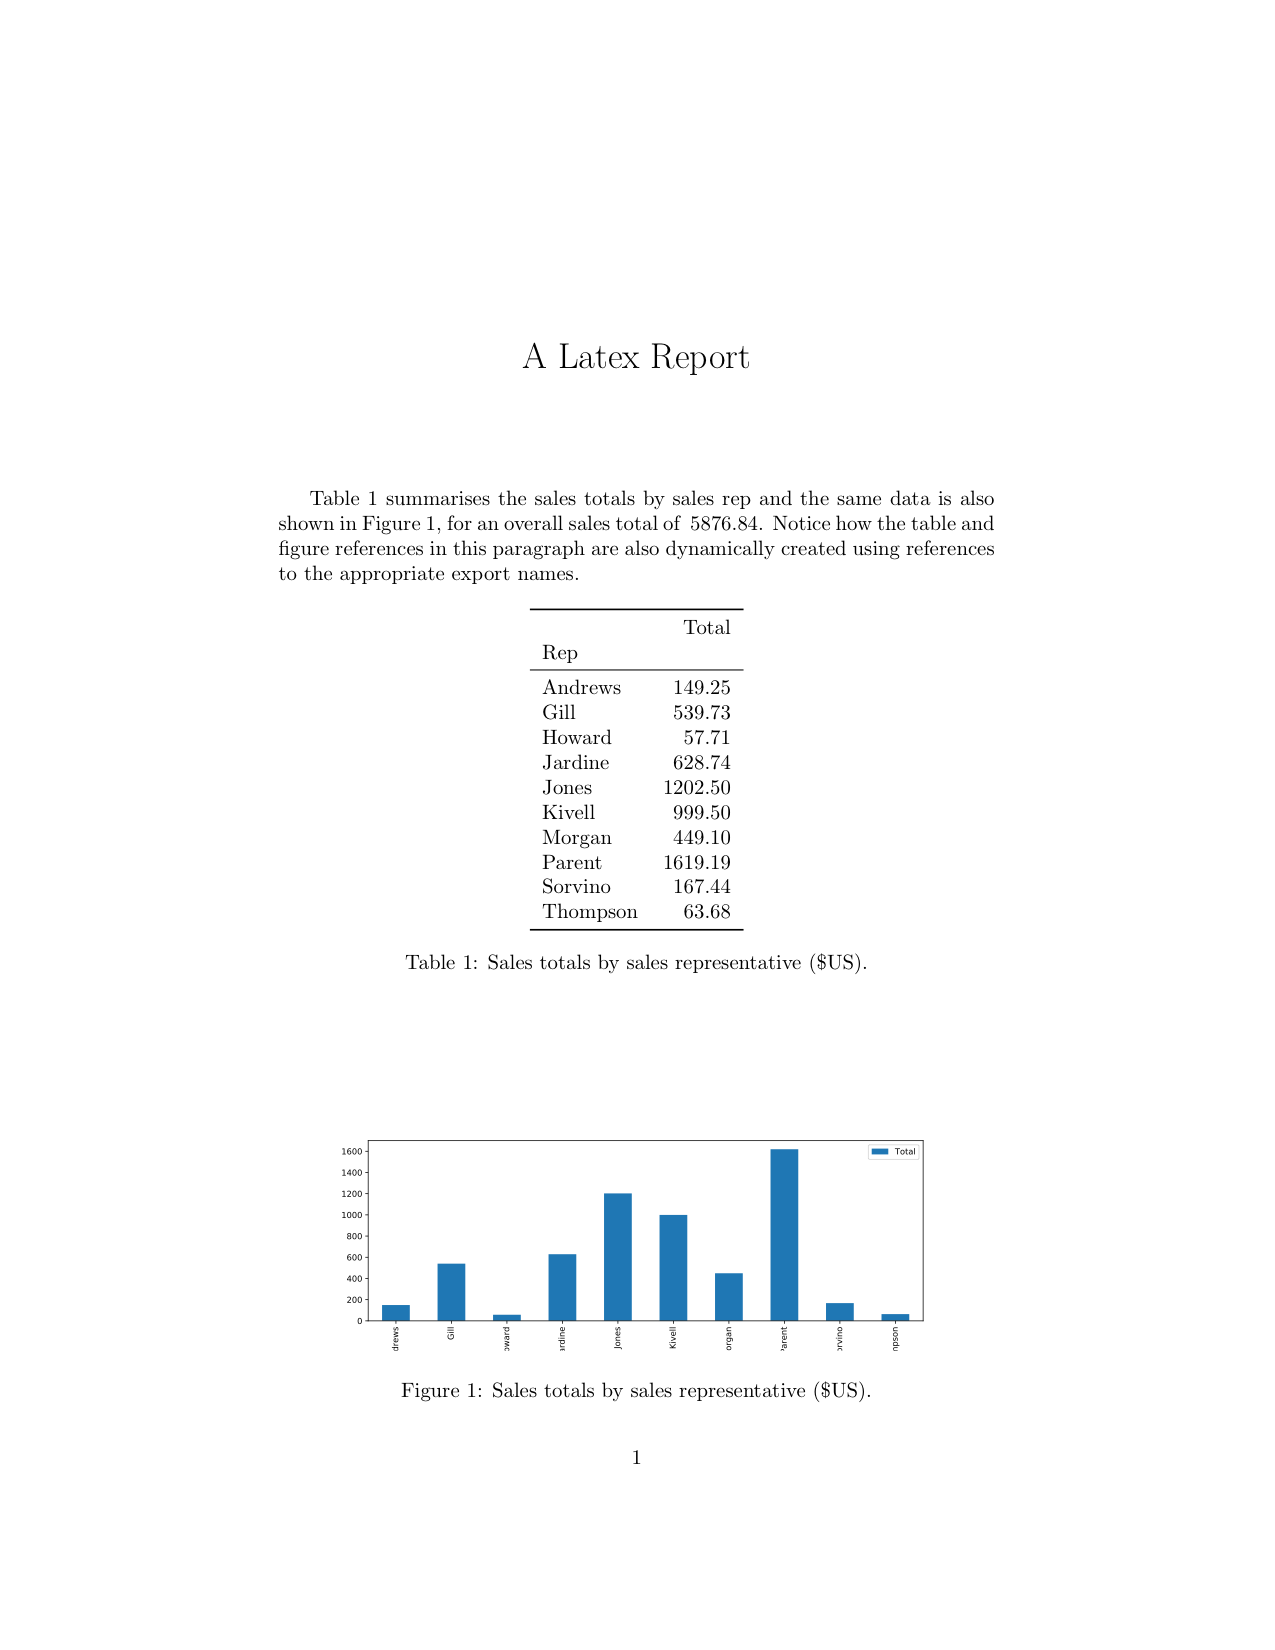

In [21]:
from IPython.display import Image
Image(filename=('sandbox/latex_report/tex/latex_report.png'))

### Some time later; just because we can ...

A major benefit of Kallysto is how easy it makes it to reflect future analysis in a publication. For example, if at some stage in the future the analysis needs to change –– for example we need to change the currency used and convert the values accordingly –– then we can simply re-run the notebook to re-export the new data and regenerate the publication.

Value('TotalSales', 7346.05)

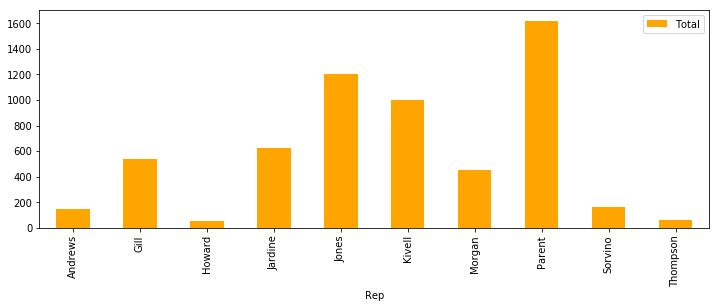

In [22]:
# Re-export the new data and results.
sales_by_rep_table = Export.table('SalesByRepTable', 
             data=sales_by_rep[['Total']].apply(
                 lambda v: round(v*1.25, 2)),  # round to 2 decimal places after conversion.
             caption='Sales totals by sales representative (\$AUS).'
) 

sales_by_rep_table > latex_report

fig, ax = plt.subplots(figsize=(12, 4))

sales_by_rep.plot(kind='bar', color='orange', ax=ax)

sales_by_rep_bar_chart = Export.figure(
    'SalesByRepBarChart',  # Export name
    image=fig,             # The plot to be exported
    data=sales_by_rep,     # The data used to produce the plot.
    caption='Sales totals by sales representative (\$AUS).'
) 

sales_by_rep_bar_chart > latex_report

total_sales = Export.value('TotalSales', sales_by_rep['Total'].sum()*1.25)

total_sales > latex_report

### Et Voila!

Latexmk: This is Latexmk, John Collins, 22 April 2016, version: 4.45.
Latexmk: Changing directory to 'sandbox/latex_report/tex/'
Latexmk: applying rule 'pdflatex'...
Rule 'pdflatex': Rules & subrules not known to be previously run:
   pdflatex
Rule 'pdflatex': The following rules & subrules became out-of-date:
      'pdflatex'
------------
Run number 1 of rule 'pdflatex'
------------
------------
Running 'pdflatex -interaction=batchmode  -recorder  "latex_report.tex"'
------------
This is pdfTeX, Version 3.14159265-2.6-1.40.17 (TeX Live 2016) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
Latexmk: References changed.
Latexmk: Log file says output to 'latex_report.pdf'
Latexmk: List of undefined refs and citations:
  Reference `SalesByRepBarChart' on page 1 undefined on input line 20
  Reference `SalesByRepTable' on page 1 undefined on input line 20
Latexmk: Summary of warnings:
  Latex failed to resolve 2 reference(s)
Latexmk: applying rule 'pdflatex'.

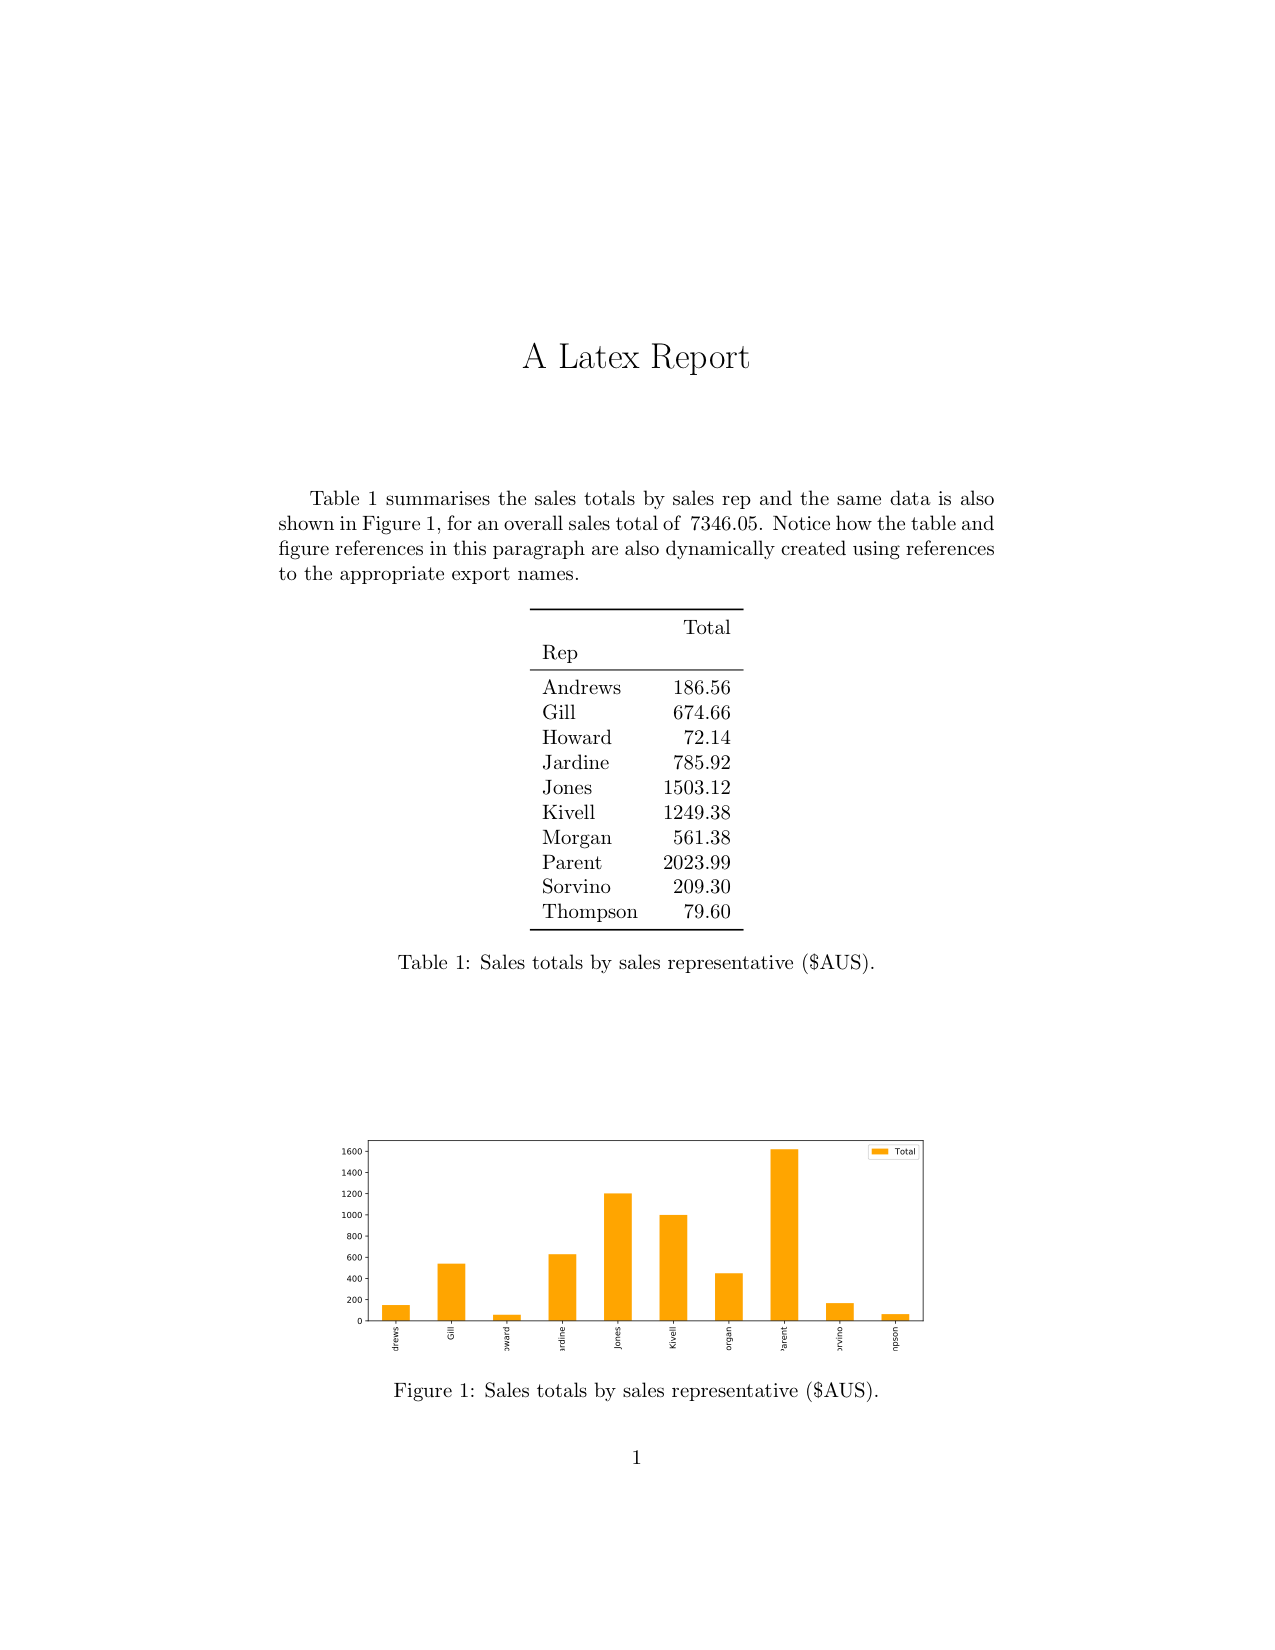

In [23]:
# Recompile .tex, convert pdf to png, display png.
!latexmk -pdf -pdflatex="pdflatex -interaction=batchmode" -f -cd -use-make sandbox/latex_report/tex/latex_report.tex && latexmk -c -cd sandbox/latex_report/tex/latex_report.tex 
!sips -s format png sandbox/latex_report/tex/latex_report.pdf --out sandbox/latex_report/tex/latex_report.png
Image(filename=('sandbox/latex_report/tex/latex_report.png'))

## Kallysto & Markdown
So far all of the examples have assumed Latex as the target publication type and when exports were transferred to the Latex publication Kallysto generated Latex-compatible defintions. Kallysto can also work to produce Markdown documents; Markdown is one of the most popular and most flexible formats in common use and Markdown documents can be easily converted into a range of other formats.

Unfortunately the markdown syntax does not support importing data; thjere is no _general_ mechanism for referring to, or including, third-party data (other than images). As a workaround, Kallysto extends the standard Markdown syntax to allow for Kallysto imports, and then includes a converter to produce this extended syntax into standard Markdown after incorporating the imports.

### Kallysto Markdown (.kmd)
Kallysto adds a single additional piece of syntax (`{export_name}`) to implement Kalluysto imports and we use the file extension `.kmd` to refer to Markdown files which use this extended syntax. For all intents and purposes `.kmd` files are just regular Markdown (`.md`) files. They can be produced and rendered in the same was as standard `.md` files, although rendering a `.kmd` file will obviously not incorporate and imports.

To import a Kallysto export we enclose the export name within pairs of braces. Thus in a `.kmd` file, the text `{TotalSales}` will be replaced by the _TotalSales_ value export. `{SalesByRepTable}` will be replaced by a Markdown table with the sales data and  `{SalesByRepBarChart}` will be replaced by the sales bar chart; actually it will be replaced by a Markdown inline image link.

### Kallysto Markdown Preprocessor
The following converts a Kallysto markdown file (`report.kmd`), which contains references to Kallysto exports, into a standard markdown file with the references replaced by the corresponding exports (values, tables, figures). The conversion processes uses the `kallysto.kmd` file, which is generated by Kallysto for markdown publications, in order to locate all of the relevant markdown export defintions; the `kallysto.kmd` file is the equivalent of the `kallysto.tex` file mentioned earlier.

`kallysto.markdown.to_markdown('report.kmd','kallysto.kmd')`

### Worked Example
By way of a worked example, the following code creates a new publication link from this notebook to a markdown publication titled `markdown_report` and exports the previous value, table and figure exports to this publication.

In [24]:
md_report = Publication(
    notebook='README.ipynb',  # Current notebook name
    title='markdown_report',         # Publication name
    pub_path='sandbox/',         # Location of publication project.
    formatter=Markdown,
    overwrite=True, 
    fresh_start=True
)

In [25]:
total_sales > md_report

Value('TotalSales', 7346.05)

In [26]:
sales_by_rep_table > md_report

Table('SalesByRepTable',             Total
Rep              
Andrews    186.56
Gill       674.66
Howard      72.14
Jardine    785.92
Jones     1503.12
Kivell    1249.38
Morgan     561.38
Parent    2023.99
Sorvino    209.30
Thompson    79.60, 'Sales totals by sales representative (\\$AUS).')

In [27]:
sales_by_rep_bar_chart > md_report

Figure('SalesByRepBarChart', <Figure size 864x288 with 1 Axes>,             Total
Rep              
Andrews    149.25
Gill       539.73
Howard      57.71
Jardine    628.74
Jones     1202.50
Kivell     999.50
Morgan     449.10
Parent    1619.19
Sorvino    167.44
Thompson    63.68, 'Sales totals by sales representative (\\$AUS).', 'pdf')

Once again we create a minimal Kallyso markdown file with references to these exports.

In [28]:
minimal_kmd = r"""
# A Markdown Report

The table summarises the sales totals by sales rep and the same data is also shown in the following bar chart, for an overall sales total of {TotalSales}.

{SalesByRepTable}
 
{SalesByRepBarChart}
"""

# Save the minimal kmd.
with open('sandbox/markdown_report/md/markdown_report.kmd', 'w+') as latex_source:
    latex_source.write(minimal_kmd)

In [29]:
# A minimal markdown document
!cat sandbox/markdown_report/md/markdown_report.kmd


# A Markdown Report

The table summarises the sales totals by sales rep and the same data is also shown in the following bar chart, for an overall sales total of {TotalSales}.

{SalesByRepTable}
 
{SalesByRepBarChart}


In [30]:
kallysto.markdown.to_markdown(
    'sandbox/markdown_report/md/markdown_report.kmd',
    'sandbox/markdown_report/md/kallysto.kmd')

'sandbox/markdown_report/md/markdown_report.md'

Convert the .kmd to a .md file by replacing the export references with the exports themselves.

In [31]:
# A minimal markdown document
!cat sandbox/markdown_report/md/markdown_report.md


# A Markdown Report

The table summarises the sales totals by sales rep and the same data is also shown in the following bar chart, for an overall sales total of 7346.05.

| Rep      |   Total |
|:---------|--------:|
| Andrews  |  186.56 |
| Gill     |  674.66 |
| Howard   |   72.14 |
| Jardine  |  785.92 |
| Jones    | 1503.12 |
| Kivell   | 1249.38 |
| Morgan   |  561.38 |
| Parent   | 2023.99 |
| Sorvino  |  209.3  |
| Thompson |   79.6  |
 
![SalesByRepBarChart](../_kallysto/figs/README.ipynb/SalesByRepBarChart.pdf "Sales totals by sales representative (\$AUS).")


/Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/sandbox/markdown_report/md
/Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/sandbox/markdown_report/md/markdown_report.pdf
  /Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto/sandbox/markdown_report/md/markdown_report.png
/Users/barrysmyth/Dropbox/Documents@MBA2/Code/Python/kallysto


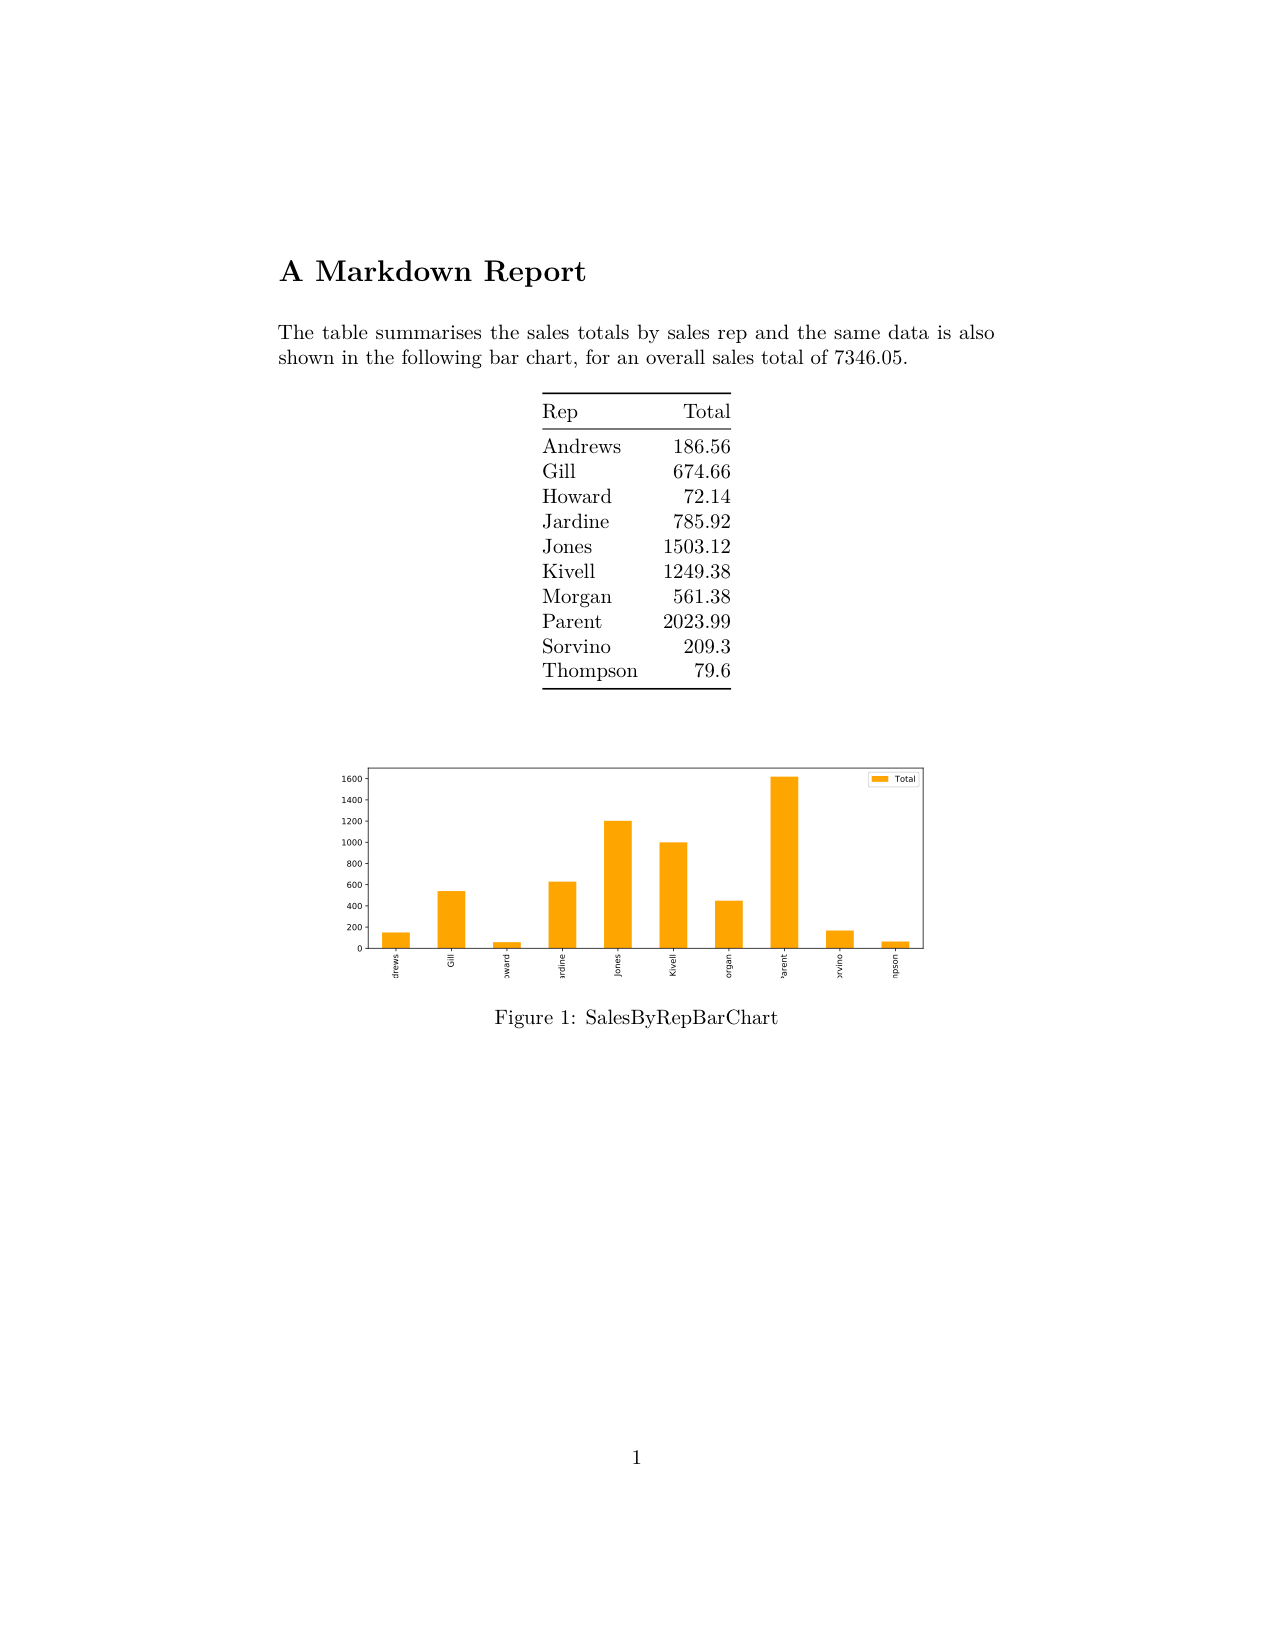

In [32]:
# Markdown > PDF > PNG for easy display in a notebook cell.

# Need to cd into the md directory so that the relative links in
# the md file will work correctly.
%cd sandbox/markdown_report/md

# Convert to PDF and then to PNG
!pandoc -s markdown_report.md -o markdown_report.pdf
!sips -s format png markdown_report.pdf --out markdown_report.png

# cd back home
%cd ../../..

# Display the PNG of the rendered markdown file.
Image(filename=('sandbox/markdown_report/md/markdown_report.png'))

## Create README.md
We automatically produce the repo README file from this notebook.

In [33]:
# Convert this notebook to markdown so that there is an uptodate README.md for GitHub.
!jupyter nbconvert --to markdown README.ipynb

[NbConvertApp] Converting notebook README.ipynb to markdown
[NbConvertApp] Support files will be in README_files/
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Making directory README_files
[NbConvertApp] Writing 39622 bytes to README.md


## Cleanup
Delete the sandbox.

In [34]:
rmtree('sandbox')